#This notebook includes:

###time evolution information of 231Pa and 230Th in Canada Basin, Alpha Ridge and Nansen Basin

In [1]:
from pykrige.ok import OrdinaryKriging
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os,glob,copy
from matplotlib import gridspec
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [4]:
nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/*_ptrc_T*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1m_00010101_00041001_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1m_00010101_00011231_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1y_00010101_00011231_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1y_00010101_00041001_ptrc_T.nc']


In [5]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:]/(1e6)
TR_8=ptrc.variables['TR_8'][:]/(1e6)
TR_9=ptrc.variables['TR_9'][:]/(1e6)
TR_10=ptrc.variables['TR_10'][:]/(1e6)
depth = ptrc.variables['deptht'][:]
print TR_7.shape

(45, 31, 149, 182)


In [6]:
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
TR_10=np.ma.masked_where(TR_10<= 0, TR_10)
TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
TR_10=np.ma.masked_where(np.isnan(TR_10),TR_10)

#Canada Basin 

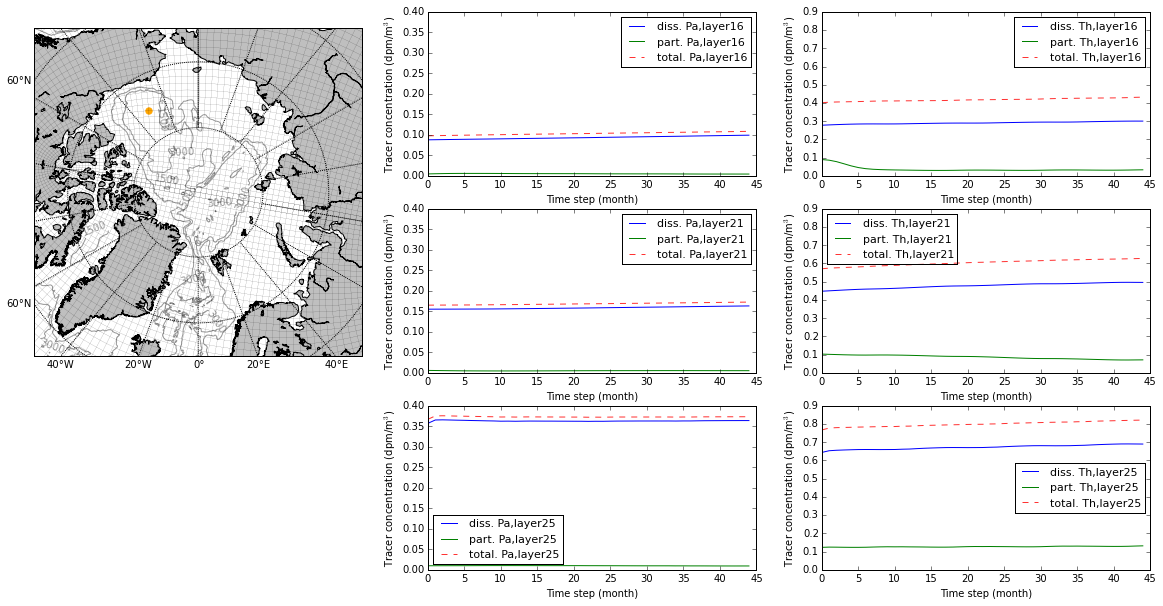

In [31]:
j=25;i=16;k=21
ylim=[0,0.4];ylim2=[0,0.9]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0:2,0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='k',linewidth=0.1)
m.scatter(x_lon[133,60],y_lat[133,60],color='orange',s=40)
#m.scatter(x_lon[145,51],y_lat[145,51],color='red',s=40)
#m.scatter(x_lon[141,138],y_lat[141,138],color='green',s=40)

etopodata = nc.Dataset('http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc')
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  
m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

ax = fig.add_subplot(gs[0,1])
plt.plot(TR_7[:,i,133,60],label=('diss. Pa,layer%s'%i))
plt.plot(TR_9[:,i,133,60],label=('part. Pa,layer%s'%i))
plt.plot(TR_7[:,i,133,60]+TR_9[:,j,133,60],linestyle='--',label=('total. Pa,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[0,2])      
plt.plot(TR_8[:,i,133,60],label=('diss. Th,layer%s'%i))
plt.plot(TR_10[:,i,133,60],label=('part. Th,layer%s'%i))
plt.plot(TR_8[:,i,133,60]+TR_10[:,j,133,60],linestyle='--',label=('total. Th,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,1])
plt.plot(TR_7[:,k,133,60],label=('diss. Pa,layer%s'%k))
plt.plot(TR_9[:,k,133,60],label=('part. Pa,layer%s'%k))
plt.plot(TR_7[:,k,133,60]+TR_9[:,j,133,60],linestyle='--',label=('total. Pa,layer%s'%k),alpha=0.8)      
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,2])
plt.plot(TR_8[:,k,133,60],label=('diss. Th,layer%s'%k))
plt.plot(TR_10[:,k,133,60],label=('part. Th,layer%s'%k))
plt.plot(TR_8[:,k,133,60]+TR_10[:,j,133,60],linestyle='--',label=('total. Th,layer%s'%k),alpha=0.8)      
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)

ax = fig.add_subplot(gs[2,1])
plt.plot(TR_7[:,j,133,60],label=('diss. Pa,layer%s'%j))
plt.plot(TR_9[:,j,133,60],label=('part. Pa,layer%s'%j))
plt.plot(TR_7[:,j,133,60]+TR_9[:,j,133,60],linestyle='--',label=('total. Pa,layer%s'%j),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,2])
plt.plot(TR_8[:,j,133,60],label=('diss. Th,layer%s'%j))
plt.plot(TR_10[:,j,133,60],label=('part. Th,layer%s'%j))
plt.plot(TR_8[:,j,133,60]+TR_10[:,j,133,60],linestyle='--',label=('total. Th,layer%s'%j),alpha=0.8)
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)

plt.show()

ps. Layer 16=181.96m(Pacific Layer)
Layer 21=732.20m(Atlantic Layer)
Layer 25=2289.77m(Arctic bottom water)

#Alpha Ridge

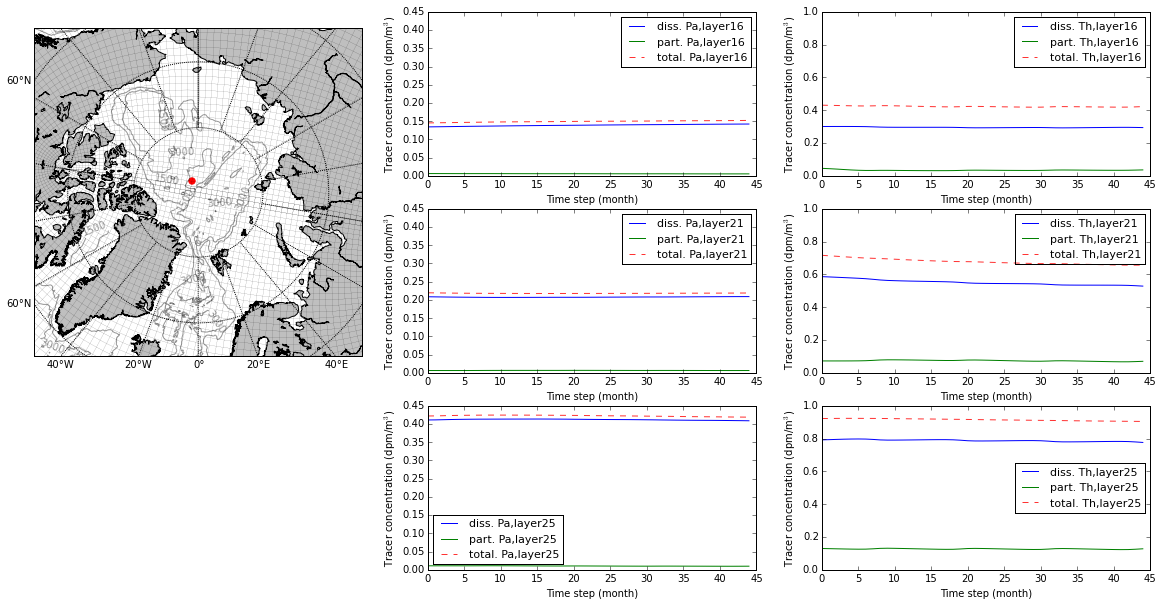

In [26]:
j=25;i=16;k=21
ylim=[0,0.45];ylim2=[0,1]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0:2,0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='k',linewidth=0.1)
m.scatter(x_lon[145,51],y_lat[145,51],color='red',s=40)

etopodata = nc.Dataset('http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc')
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  
m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

ax = fig.add_subplot(gs[0,1])
plt.plot(TR_7[:,i,145,51],label=('diss. Pa,layer%s'%i))
plt.plot(TR_9[:,i,145,51],label=('part. Pa,layer%s'%i))
plt.plot(TR_7[:,i,145,51]+TR_9[:,j,145,51],linestyle='--',label=('total. Pa,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[0,2])       
plt.plot(TR_8[:,i,145,51],label=('diss. Th,layer%s'%i))
plt.plot(TR_10[:,i,145,51],label=('part. Th,layer%s'%i))
plt.plot(TR_8[:,i,145,51]+TR_10[:,j,145,51],linestyle='--',label=('total. Th,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,1])
plt.plot(TR_7[:,k,145,51],label=('diss. Pa,layer%s'%k))
plt.plot(TR_9[:,k,145,51],label=('part. Pa,layer%s'%k))
plt.plot(TR_7[:,k,145,51]+TR_9[:,j,145,51],linestyle='--',label=('total. Pa,layer%s'%k),alpha=0.8)      
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,2])
plt.plot(TR_8[:,k,145,51],label=('diss. Th,layer%s'%k))
plt.plot(TR_10[:,k,145,51],label=('part. Th,layer%s'%k))
plt.plot(TR_8[:,k,145,51]+TR_10[:,j,145,51],linestyle='--',label=('total. Th,layer%s'%k),alpha=0.8)      
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)

ax = fig.add_subplot(gs[2,1])
plt.plot(TR_7[:,j,145,51],label=('diss. Pa,layer%s'%j))
plt.plot(TR_9[:,j,145,51],label=('part. Pa,layer%s'%j))
plt.plot(TR_7[:,j,145,51]+TR_9[:,j,145,51],linestyle='--',label=('total. Pa,layer%s'%j),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.legend(loc=0,fontsize=11)
plt.ylim(ylim)

ax = fig.add_subplot(gs[2,2])
plt.plot(TR_8[:,j,145,51],label=('diss. Th,layer%s'%j))
plt.plot(TR_10[:,j,145,51],label=('part. Th,layer%s'%j))
plt.plot(TR_8[:,j,145,51]+TR_10[:,j,145,51],linestyle='--',label=('total. Th,layer%s'%j),alpha=0.8)
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)

plt.show()

ps. Layer 16=181.96m(Pacific Layer)
Layer 21=732.20m(Atlantic Layer)
Layer 25=2289.77m(Arctic bottom water)

#Nansen Basin

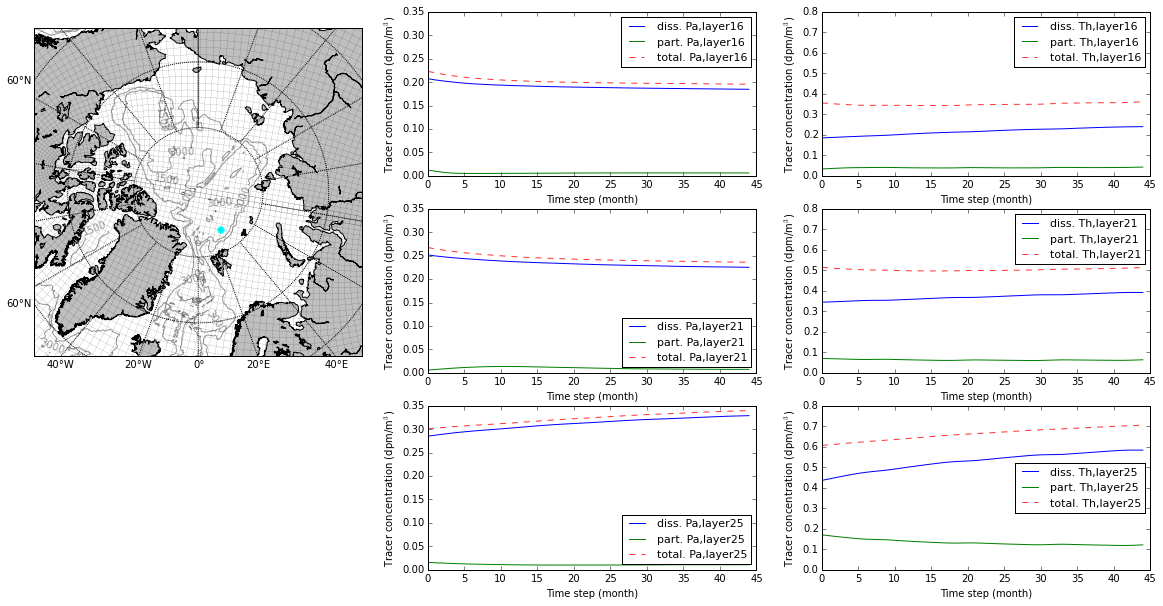

In [29]:
j=25;i=16;k=21
ylim=[0,0.35];ylim2=[0,0.8]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0:2,0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='k',linewidth=0.1)
#m.scatter(x_lon[133,60],y_lat[133,60],color='orange',s=40)
#m.scatter(x_lon[145,51],y_lat[145,51],color='red',s=40)
m.scatter(x_lon[141,138],y_lat[141,138],color='cyan',s=40)

etopodata = nc.Dataset('http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc')
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  
m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

ax = fig.add_subplot(gs[0,1])
plt.plot(TR_7[:,i,141,138],label=('diss. Pa,layer%s'%i))
plt.plot(TR_9[:,i,141,138],label=('part. Pa,layer%s'%i))
plt.plot(TR_7[:,i,141,138]+TR_9[:,j,141,138],linestyle='--',label=('total. Pa,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[0,2])     
plt.plot(TR_8[:,i,141,138],label=('diss. Th,layer%s'%i))
plt.plot(TR_10[:,i,141,138],label=('part. Th,layer%s'%i))
plt.plot(TR_8[:,i,141,138]+TR_10[:,j,141,138],linestyle='--',label=('total. Th,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,1])
plt.plot(TR_7[:,k,141,138],label=('diss. Pa,layer%s'%k))
plt.plot(TR_9[:,k,141,138],label=('part. Pa,layer%s'%k))
plt.plot(TR_7[:,k,141,138]+TR_9[:,j,141,138],linestyle='--',label=('total. Pa,layer%s'%k),alpha=0.8)      
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,2])
plt.plot(TR_8[:,k,141,138],label=('diss. Th,layer%s'%k))
plt.plot(TR_10[:,k,141,138],label=('part. Th,layer%s'%k))
plt.plot(TR_8[:,k,141,138]+TR_10[:,j,141,138],linestyle='--',label=('total. Th,layer%s'%k),alpha=0.8)      
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)

ax = fig.add_subplot(gs[2,1])
plt.plot(TR_7[:,j,141,138],label=('diss. Pa,layer%s'%j))
plt.plot(TR_9[:,j,141,138],label=('part. Pa,layer%s'%j))
plt.plot(TR_7[:,j,141,138]+TR_9[:,j,141,138],linestyle='--',label=('total. Pa,layer%s'%j),alpha=0.8)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,2])
plt.plot(TR_8[:,j,141,138],label=('diss. Th,layer%s'%j))
plt.plot(TR_10[:,j,141,138],label=('part. Th,layer%s'%j))
plt.plot(TR_8[:,j,141,138]+TR_10[:,j,141,138],linestyle='--',label=('total. Th,layer%s'%j),alpha=0.8)
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (month)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
plt.ylim(ylim2)

plt.show()

ps. Layer 16=181.96m(Pacific Layer)
Layer 21=732.20m(Atlantic Layer)
Layer 25=2289.77m(Arctic bottom water)

In [6]:
z=181.96

pa_p=0.00246/500*z
th_p=0.0267/500*z

pa_d=0.00246/0.08+0.00246/500*1/0.08*z
th_d=0.0267/1+0.0267/500*1.60/1*z

print ('depth:%s'%z)
print ('')
print ('pa_p:%s,th_p:%s'%(pa_p,th_p))
print ('pa_d:%s,th_d:%s'%(pa_d,th_d))

depth:181.96

pa_p:0.0008952432,th_p:0.009716664
pa_d:0.04194054,th_d:0.0422466624


In [7]:
z=732.20

pa_p=0.00246/500*z
th_p=0.0267/500*z

pa_d=0.00246/0.08+0.00246/500*1/0.08*z
th_d=0.0267/1+0.0267/500*1.60/1*z

print ('depth:%s'%z)
print ('')
print ('pa_p:%s,th_p:%s'%(pa_p,th_p))
print ('pa_d:%s,th_d:%s'%(pa_d,th_d))

depth:732.2

pa_p:0.003602424,th_p:0.03909948
pa_d:0.0757803,th_d:0.089259168


In [8]:
z=2289.77

pa_p=0.00246/500*z
th_p=0.0267/500*z

pa_d=0.00246/0.08+0.00246/500*1/0.08*z
th_d=0.0267/1+0.0267/500*1.60/1*z

print ('depth:%s'%z)
print ('')
print ('pa_p:%s,th_p:%s'%(pa_p,th_p))
print ('pa_d:%s,th_d:%s'%(pa_d,th_d))

depth:2289.77

pa_p:0.0112656684,th_p:0.122273718
pa_d:0.171570855,th_d:0.2223379488
